## Bank Marketing

  For this project, I am using this dataset of bank marketing https://archive.ics.uci.edu/dataset/222/bank+marketing . It is a marketing campaigns of a Portuguese banking instituion.The goal is to predict if the client subscribe a term deposit. It has 45211 instances and 16 features. 


## 1. Import packages and classes

Import all the required libraries :

In [156]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
import seaborn as sns


## 2. Import the data


This part helps to load the dataset from a csv file.

In [126]:

bank_data = pd.read_csv("Data/bank-full.csv",sep=';',quotechar='"')
                    


Prints the first rows of the dataset

In [127]:
print(bank_data.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


Prints out the last few data rows.

In [145]:
print(bank_data.tail())

       age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  


Prints out the summary statistics of the dataset

In [128]:
print(bank_data.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

It checks if there is any missing data and prints out

In [129]:
print(bank_data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Prints out the column names of the dataset.

In [130]:
print(bank_data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


Feature_cols helps to select the set of features from the dataset. Here the X is the features and y is the target variable from the dataset.

In [131]:
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
X = bank_data[feature_cols]
y = bank_data['y']


## One-Hot Coding

This part tries to convert the categorical features into a numerical features.

In [132]:
X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

##  Split the data

This helps to split the datset into training and test dataset. The ration is 70%-30%. 

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Prints out the X value.

In [134]:
print(X)

       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0       58     2143    5       261         1     -1         0       False   
1       44       29    5       151         1     -1         0       False   
2       33        2    5        76         1     -1         0       False   
3       47     1506    5        92         1     -1         0       False   
4       33        1    5       198         1     -1         0       False   
...    ...      ...  ...       ...       ...    ...       ...         ...   
45206   51      825   17       977         3     -1         0       False   
45207   71     1729   17       456         2     -1         0       False   
45208   72     5715   17      1127         5    184         3       False   
45209   57      668   17       508         4     -1         0       False   
45210   37     2971   17       361         2    188        11       False   

       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
0   

Prints out the y value.

In [135]:
print(y)

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object


## Creating the Decision Tree 

In the Decision Tree, here it is using entropy.

In [136]:
bank_decision_tree = DecisionTreeClassifier(criterion = "entropy")

## Train Decision Tree

Here, X_train and y_train is on the training data for the decision tree.

In [ ]:

bank_decision_tree = bank_decision_tree.fit(X_train, y_train)

## Prediction

Test data makes the prediction in the X_test.

In [137]:
y_pred = bank_decision_tree.predict(X_test)

## Accuracy

It calculates the accuracy of the decision tree model on the test data and prints out.

In [144]:

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8725302270716603


Here you can see the visualization of the distributed target variable of y.

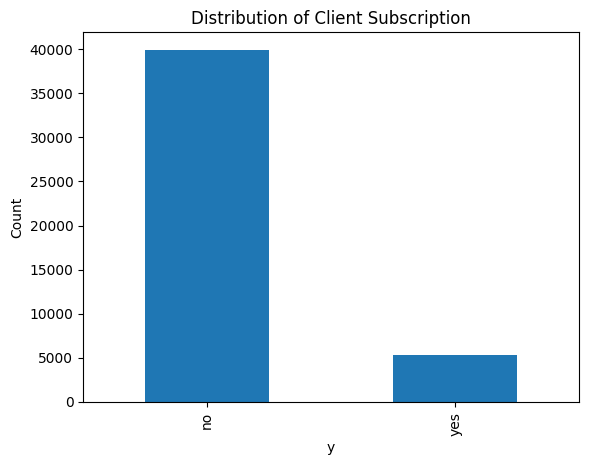

In [147]:
bank_data['y'].value_counts().plot(kind='bar')
plt.xlabel("y")
plt.ylabel("Count")
plt.title("Distribution of Client Subscription")
plt.show()

## K-Nearest Neighbors

First it creates a variable called bank_data_k for the K-Nearest Neighbors with 5 neighbors. Then it trains the X_train and y_train on the model of training data. It makes the prediction from the X_test. After that, it calculates and prints out the accuracy of the test data.

In [150]:
bank_data_k = KNeighborsClassifier(n_neighbors=5)
bank_data_k.fit(X_train,y_train)
y_pred_k = bank_data_k.predict(X_test)
accuracy_k = metrics.accuracy_score(y_test,y_pred_k)


In [151]:
print("K-Nearest Neighbors Accuracy:",accuracy_k)

K-Nearest Neighbors Accuracy: 0.8815246240047184


## Confusion Matrix

First it calculates the confusion matrix from the decision tree. Prints out.

In [154]:

confusion_decision_tree = confusion_matrix(y_test,y_pred)
print("Confusion Matrix (Decision Tree):",confusion_decision_tree)

Confusion Matrix (Decision Tree): [[11104   862]
 [  867   731]]


This is the visualization for the confusion matrix of the decision tree using the heatmap of seaborn. Basically, heatmap helps to preset the positive and negative true, positive and negative false. To make it understand for easily.

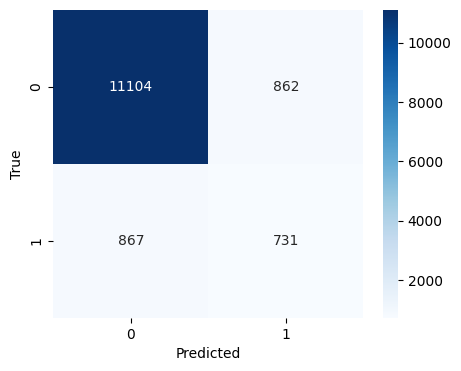

In [160]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_decision_tree,annot = True, fmt="d",cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In the conclusion, I would like to say there is 0.87 accuracy of the term deposit of the client subscription. While working with the task i tried to search some of the ideas from chatgpt and other website https://machinelearningmastery.com/types-of-classification-in-machine-learning/. To learn about the classification of the machine learning.This is the streamlit link:https://task-mlbenchmarking-two-ml-algorithms-ditzhsgzodqjlgtbyqerpv.streamlit.app/